In [3]:
import requests, json
from pandas import DataFrame
import pandas as pd



# Read in CSV file for Bike Sharing
df4 = pd.read_csv('Docked_Bikeshare.csv')

#Show first 10 rows of df4
print(df4.head(10))

  sysid                  sysname   year  assigned_month         yr_mo_d  \
0     1  Blue Bikes (Boston, MA)  2,019               1   1/2/2019 0:00   
1     1  Blue Bikes (Boston, MA)  2,019               1   1/3/2019 0:00   
2     1  Blue Bikes (Boston, MA)  2,019               1   1/4/2019 0:00   
3     1  Blue Bikes (Boston, MA)  2,019               1   1/5/2019 0:00   
4     1  Blue Bikes (Boston, MA)  2,019               1   1/6/2019 0:00   
5     1  Blue Bikes (Boston, MA)  2,019               1   1/7/2019 0:00   
6     1  Blue Bikes (Boston, MA)  2,019               1   1/8/2019 0:00   
7     1  Blue Bikes (Boston, MA)  2,019               1   1/9/2019 0:00   
8     1  Blue Bikes (Boston, MA)  2,019               1  1/10/2019 0:00   
9     1  Blue Bikes (Boston, MA)  2,019               1  1/11/2019 0:00   

     sum_min num_trip                    sysname_alt  
0  32,186.70    2,623  Boston Metro, MA (Blue Bikes)  
1  36,631.67    2,993  Boston Metro, MA (Blue Bikes)  
2  43,345

In [4]:
#Show only information related to New York
print(df4[df4['sysname'].str.contains("New York")].head())


     sysid                  sysname   year  assigned_month        yr_mo_d  \
1093     3  CitiBike (New York, NY)  2,019               1  1/2/2019 0:00   
1094     3  CitiBike (New York, NY)  2,019               1  1/3/2019 0:00   
1095     3  CitiBike (New York, NY)  2,019               1  1/4/2019 0:00   
1096     3  CitiBike (New York, NY)  2,019               1  1/5/2019 0:00   
1097     3  CitiBike (New York, NY)  2,019               1  1/6/2019 0:00   

         sum_min num_trip              sysname_alt  
1093  459,481.83   37,714  New York, NY (CitiBike)  
1094  487,445.42   41,573  New York, NY (CitiBike)  
1095  514,357.78   43,790  New York, NY (CitiBike)  
1096  188,330.93   17,412  New York, NY (CitiBike)  
1097  392,897.40   31,424  New York, NY (CitiBike)  


In [5]:
print('Show columns that are included in bikedf dataframe''\n')
print(df4.columns)


Show columns that are included in bikedf dataframe

Index(['sysid', 'sysname', 'year', 'assigned_month', 'yr_mo_d', 'sum_min',
       'num_trip', 'sysname_alt'],
      dtype='object')


In [6]:
# Slice dataframe to only include information for SysName, Year, assigned_month, and sum_min
bikedf1 = df4.loc[:,['sysname', 'year', 'assigned_month', 'sum_min' ]]

print('\n', 'Preview Bikedf1 dataframe')
print(bikedf1.head())

print('\n','Check data types of columns in bikedf1')
print(bikedf1.dtypes)



 Preview Bikedf1 dataframe
                   sysname   year  assigned_month    sum_min
0  Blue Bikes (Boston, MA)  2,019               1  32,186.70
1  Blue Bikes (Boston, MA)  2,019               1  36,631.67
2  Blue Bikes (Boston, MA)  2,019               1  43,345.42
3  Blue Bikes (Boston, MA)  2,019               1   9,176.97
4  Blue Bikes (Boston, MA)  2,019               1  21,476.20

 Check data types of columns in bikedf1
sysname           object
year              object
assigned_month     int64
sum_min           object
dtype: object


In [7]:
# Function that remove commas from number fields
def remove_NumberCommas(x):
	return str(x.replace(',', ''))


# Remove commas from year field
bikedf1["year"] = bikedf1["year"].apply(remove_NumberCommas)

#Change datatype for year field to int
bikedf1["year"] = bikedf1["year"].astype(int)


#Remove commas from sum_min field
bikedf1["sum_min"] = bikedf1["sum_min"].apply(remove_NumberCommas)

#Change data type of columnn sum_min to float
bikedf1["sum_min"] = bikedf1["sum_min"].astype(float)

#Change data type of columnn year to int
bikedf1["year"] = bikedf1["year"].astype(str).astype(int)
#Too here*******



print('\n','Check for Updated data types')
print(bikedf1.dtypes)


 Check for Updated data types
sysname            object
year                int64
assigned_month      int64
sum_min           float64
dtype: object


In [8]:
# Function that remove ')' from value
def remove_CloseParath(x):
    return str(x.replace(')', ''))
    

#Prepping column sysname by removing certain parts to get 
bikedf1['sysname'] = bikedf1['sysname'].str.split('\(').str[-1].str.strip()
bikedf1['sysname'] = bikedf1['sysname'].apply(remove_CloseParath)

print('\n','Show dataframe after prepping column sysname and data type change of year and sum_min')
print(bikedf1.head())



 Show dataframe after prepping column sysname and data type change of year and sum_min
      sysname  year  assigned_month   sum_min
0  Boston, MA  2019               1  32186.70
1  Boston, MA  2019               1  36631.67
2  Boston, MA  2019               1  43345.42
3  Boston, MA  2019               1   9176.97
4  Boston, MA  2019               1  21476.20


In [9]:
# Make column for State and city by splitting sysname column based on comma
bikedf1[['City','State']] = bikedf1.sysname.str.split(",",expand=True)


print('\n', 'Show dataframe for added columns City and State')
print(bikedf1.head())



 Show dataframe for added columns City and State
      sysname  year  assigned_month   sum_min    City State
0  Boston, MA  2019               1  32186.70  Boston    MA
1  Boston, MA  2019               1  36631.67  Boston    MA
2  Boston, MA  2019               1  43345.42  Boston    MA
3  Boston, MA  2019               1   9176.97  Boston    MA
4  Boston, MA  2019               1  21476.20  Boston    MA


In [10]:
#Group dataframe by month, year, city, and state

grouped_bikedf1 = bikedf1.groupby(['City', 'State', 'year', 'assigned_month'])

# Provide Avg sum_mins for each grouping
mean_df = grouped_bikedf1.mean()

mean_df = mean_df.reset_index()

#rename columns

mean_df.rename(columns={'year': 'Year', 'sum_min': 'Avg_Mins', 'assigned_month': 'Month'}, inplace=True)

print('\n','Dataframe of column renames, and sum_mins calculated as avg minutes' 
      ,'\n','by City, State, Year, and Month', '\n')
print(mean_df.head(), '\n')



 Dataframe of column renames, and sum_mins calculated as avg minutes 
 by City, State, Year, and Month 

     City State  Year  Month     Avg_Mins
0  Austin    TX  2019      1  5292.625000
1  Austin    TX  2019      2  6161.464286
2  Austin    TX  2019      3  9499.357143
3  Austin    TX  2019      4  8565.942857
4  Austin    TX  2019      5  6818.785714 



In [11]:
#Convert sum_mins to hours

def Convert_to_hrs(x):
    return x / 60

#Add new column for Avg_Hrs
mean_df['Avg_Hrs'] = mean_df['Avg_Mins'].apply(Convert_to_hrs)

#Create new Dataframe
Bike_Mnth = mean_df

#Rename values in City column
Bike_Mnth.loc[Bike_Mnth["City"] == "New York", "City"] = 'New York City'
Bike_Mnth.loc[Bike_Mnth["City"] == "Washington", "City"] = 'DC' 

#Filter dataframe to only return information for New York City, DC, and San Francisco
Bike_Mnth = Bike_Mnth[Bike_Mnth['City'].str.contains("New York|Francisco|DC")]

print('Bike information by month:', '\n')
print(Bike_Mnth.head())

Bike information by month: 

              City State  Year  Month       Avg_Mins       Avg_Hrs
264  New York City    NY  2019      1  343293.328125   5721.555469
265  New York City    NY  2019      2  391336.092143   6522.268202
266  New York City    NY  2019      3  544651.062857   9077.517714
267  New York City    NY  2019      4  790573.034286  13176.217238
268  New York City    NY  2019      5  910794.784643  15179.913077


In [12]:
# Information for public transit

transiturl = "https://data.bts.gov/resource/dc74-f8qd.json" 
transit = pd.read_json(transiturl)
#print(resource.head())

df5 = pd.DataFrame(transit)
pd.set_option('display.max_columns',12)

print('\n', 'Transit information by month imported from online json file:', '\n')
print(df5.head(10))


 Transit information by month imported from online json file: 

                   agency     mode       date  week_number  current_ridership  \
0  New York City MTA Rail  Transit 2021-12-18        52.21          1882956.0   
1  New York City MTA Rail  Transit 2021-12-19        52.21          1581503.0   
2  New York City MTA Rail  Transit 2021-12-20        52.21          2722430.0   
3  New York City MTA Rail  Transit 2021-12-21        52.21          2703097.0   
4  New York City MTA Rail  Transit 2021-12-22        52.21          2640159.0   
5  New York City MTA Rail  Transit 2021-12-23        52.21          2491489.0   
6  New York City MTA Rail  Transit 2021-12-24        52.21          1577738.0   
7  New York City MTA Rail  Transit 2021-12-25        53.21           811945.0   
8  New York City MTA Rail  Transit 2021-12-26        53.21          1286484.0   
9  New York City MTA Rail  Transit 2021-12-27        53.21          2011675.0   

    baseline  
0  2962312.0  
1  2810835.0 

In [13]:
# Slice dataframe to only include information for agency, date, current_ridership
transitdf1 = df5.loc[:,['agency', 'date', 'current_ridership']]

transitdf1['Year'] = pd. DatetimeIndex(transitdf1['date']). year
transitdf1['Month'] = pd. DatetimeIndex(transitdf1['date']). month

print('\n', 'Preview transitdf1 dataframe')
print(transitdf1.head())

print('\n','Check data types of columns in transitdf1')
print(transitdf1.dtypes)

#Check Unique Values in Agency column
print('\n', 'Check Unique Values in Agency column')
print(transitdf1.agency.unique())


 Preview transitdf1 dataframe
                   agency       date  current_ridership  Year  Month
0  New York City MTA Rail 2021-12-18          1882956.0  2021     12
1  New York City MTA Rail 2021-12-19          1581503.0  2021     12
2  New York City MTA Rail 2021-12-20          2722430.0  2021     12
3  New York City MTA Rail 2021-12-21          2703097.0  2021     12
4  New York City MTA Rail 2021-12-22          2640159.0  2021     12

 Check data types of columns in transitdf1
agency                       object
date                 datetime64[ns]
current_ridership           float64
Year                          int64
Month                         int64
dtype: object

 Check Unique Values in Agency column
['New York City MTA Rail' 'WMATA Bus and Rail' 'San Francisco BART Rail']


In [14]:
#Change Value names for agency column

transitdf1.loc[transitdf1["agency"] == "New York City MTA Rail", "agency"] = 'New York City'
transitdf1.loc[transitdf1["agency"] == "WMATA Bus and Rail", "agency"] = 'DC'
transitdf1.loc[transitdf1["agency"] == "San Francisco BART Rail", "agency"] = 'San Francisco'

#Rename column agency

transitdf1.rename(columns={'agency': 'City'}, inplace=True)

#print(transitdf1.dtypes)

# Create new dataframes with only specific columns for transit information
transitdf2 = transitdf1.loc[:,['City', 'Year', 'Month', 'current_ridership']]

#Group dataframe for transitdf1 by a, year, city, and state
grouped_tdf2 = transitdf2.groupby(['City', 'Year', 'Month'])

#Provide Median current ridership by month and city
grouped_tdf3 = grouped_tdf2.median()

grouped_tdf3 = grouped_tdf3.reset_index()

#rename column current_ridership
grouped_tdf3.rename(columns={'current_ridership': 'Median_Ridership'}, inplace=True)


print(grouped_tdf3.head(20))

             City  Year  Month  Median_Ridership
0              DC  2020      3          163000.0
1              DC  2020      4          144000.0
2              DC  2020      5          145000.0
3              DC  2020      6          142000.0
4              DC  2020      7          189000.0
5              DC  2020      8          199000.0
6              DC  2020      9          249000.0
7              DC  2021     12          294000.0
8              DC  2022      1          259000.0
9   New York City  2019     12         3653111.5
10  New York City  2020      1         5438418.0
11  New York City  2020      2         5485240.0
12  New York City  2020      3         1693799.0
13  New York City  2020      4          458273.5
14  New York City  2020      5          579078.0
15  New York City  2020      6          746815.5
16  New York City  2020      7         1214306.0
17  New York City  2020      8         1298728.0
18  New York City  2020      9         1624457.5
19  New York City  2

In [15]:
# Combine information for Bike_Mnth and grouped_tdf3

Combined_df = pd.merge(Bike_Mnth, grouped_tdf3,  how='left', left_on=['City','Year', 'Month'], right_on = ['City','Year', 'Month'])

#Return top 100 records from Combined_df
print('\n','Return top 100 records from Combined_df', '\n')

print(Combined_df.head(100))


 Return top 100 records from Combined_df 

             City State  Year  Month       Avg_Mins       Avg_Hrs  \
0   New York City    NY  2019      1  343293.328125   5721.555469   
1   New York City    NY  2019      2  391336.092143   6522.268202   
2   New York City    NY  2019      3  544651.062857   9077.517714   
3   New York City    NY  2019      4  790573.034286  13176.217238   
4   New York City    NY  2019      5  910794.784643  15179.913077   
..            ...   ...   ...    ...            ...           ...   
95             DC    DC  2020     12   46031.034839    767.183914   
96             DC    DC  2021      1   44776.548438    746.275807   
97             DC    DC  2021      2   33516.815714    558.613595   
98             DC    DC  2021      3   86031.364643   1433.856077   
99             DC    DC  2021      4  121324.809714   2022.080162   

    Median_Ridership  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4           

In [28]:
# Had to uninstall kaleido as this did not work to show svg file types for plotly visuals
!pip uninstall kaleido

Found existing installation: kaleido 0.2.1
Uninstalling kaleido-0.2.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/kaleido-0.2.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/kaleido/*
Proceed (y/n)? y
  Successfully uninstalled kaleido-0.2.1


In [29]:
# Was able to find a work around by github link https://github.com/plotly/Kaleido/issues/78 to successful allow svg file types to work in plotly
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:33
🔁 Restarting kernel...


In [1]:
# Workaround continued....
!conda install -c conda-forge python-kaleido

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - python-kaleido


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.5.18.1|       ha878542_0         144 KB  conda-forge
    certifi-2022.5.18.1        |   py37h89c1867_0         150 KB  conda-forge
    conda-4.12.0               |   py37h89c1867_0         1.0 MB  conda-forge
    expat-2.2.10               |       h9c3ff4c_0         164 KB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_0          94 KB  conda-forge
    font-ttf-source-code-pro-2.038|       h77eed37_0         684 KB  conda-forge
    font-ttf-ubuntu-0.83       |       hab24e

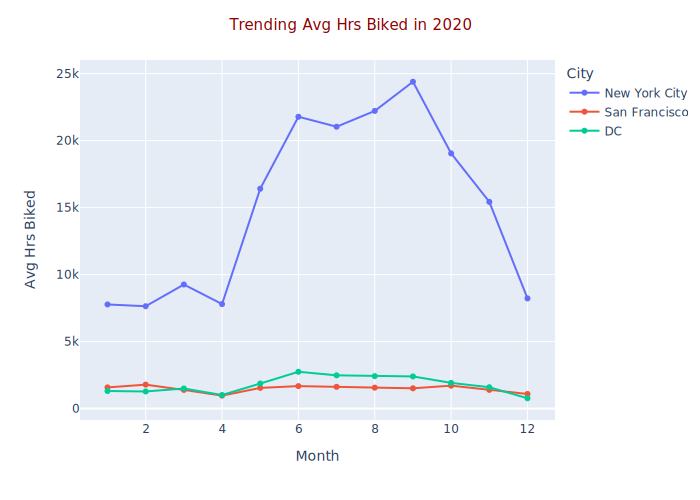


 Looking at the chart above it can be shown that NYC has highest average hours biked. To compare among the three different cities April had one of
 the lowest average hours biked.Also during the warmer months June, July, and August seem to be the highest average hours biked.


In [38]:
# Visual Information for Bike riding and Transit Ridership by Month

import plotly.express as px

#import seaborn as sns
#import matplotlib.pyplot as plt

Combined2020 = Combined_df[(Combined_df.Year == 2020)]
Combined2021 = Combined_df[(Combined_df.Year == 2021)]


fig = px.line(Combined2020, x='Month', y='Avg_Hrs', color='City', markers=True)


fig.update_layout(
                   title_text = 'Trending Avg Hrs Biked in 2020',
                   title_font = dict(size=15,family='Verdana', 
                                     color='darkred'),
                   title_x=0.5,
                  yaxis_title='Avg Hrs Biked')
fig.show("svg")

print('\n','Looking at the chart above it can be shown that NYC has highest average hours biked. To compare among the three different cities April had one of' '\n' ' the lowest average hours biked.'
     'Also during the warmer months June, July, and August seem to be the highest average hours biked.')



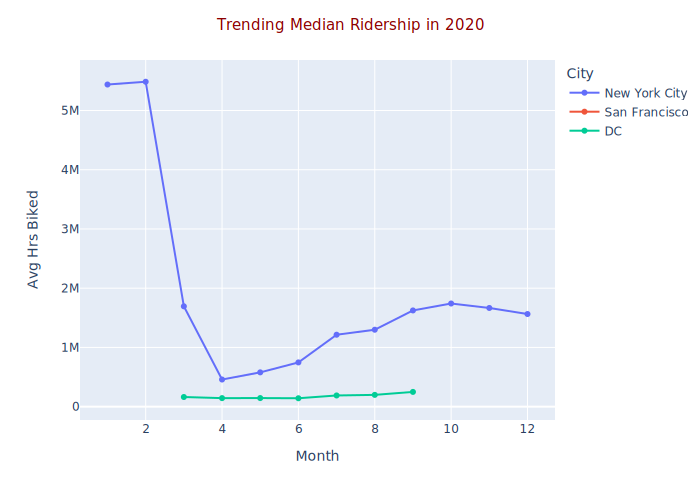


 Looking at the chart above it can be shown that NYC has highest median ridership. To compare among the different cities April had one of
 the lowest median ridership. Starting in June it appear the median ridership started on an increase.


In [40]:
# Create line graph in Plotly for Transit Information 2020

import plotly.express as px


fig = px.line(Combined2020, x='Month', y='Median_Ridership', color='City', markers=True)


fig.update_layout(
                   title_text = 'Trending Median Ridership in 2020',
                   title_font = dict(size=15,family='Verdana', 
                                     color='darkred'),
                   title_x=0.5,
                  yaxis_title='Avg Hrs Biked')
fig.show("svg")

print('\n','Looking at the chart above it can be shown that NYC has highest median ridership. To compare among the different cities April had one of' '\n' ' the lowest median'
     ' ridership. Starting in June it appear the median ridership started on an increase.')



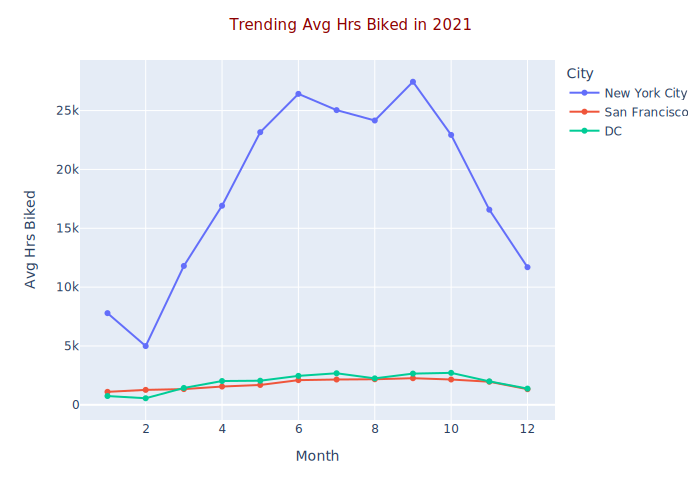


 Looking at the chart above it can be shown that NYC has highest average hours biked overall. To compare among the three different cities February had one of
 the lowest average hours biked.Also during the warmer months of June and July seem to be the highest average hours biked.


In [39]:
# Create line graph in Plotly for Bike_Month in 2021

import plotly.express as px


fig = px.line(Combined2021, x='Month', y='Avg_Hrs', color='City', markers=True)


fig.update_layout(
                   title_text = 'Trending Avg Hrs Biked in 2021',
                   title_font = dict(size=15,family='Verdana', 
                                     color='darkred'),
                   title_x=0.5,
                   yaxis_title='Avg Hrs Biked')
fig.show("svg")

print('\n','Looking at the chart above it can be shown that NYC has highest average hours biked overall. To compare among the three different cities February had one of' '\n' ' the lowest average hours biked.'
     'Also during the warmer months of June and July seem to be the highest average hours biked.')


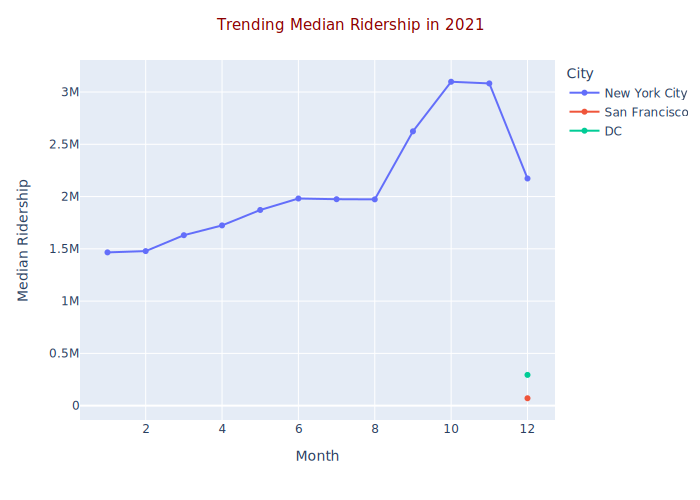


 Looking at the chart above it can be shown that NYC has highest median ridership. Unfortunately DC and San Fran only has data available for December


In [41]:
# Create line graph in Plotly for Transit Information 2021

import plotly.express as px


fig = px.line(Combined2021, x='Month', y='Median_Ridership', color='City', markers=True)


fig.update_layout(
                   title_text = 'Trending Median Ridership in 2021',
                   title_font = dict(size=15,family='Verdana', 
                                     color='darkred'),
                   title_x=0.5,
                  yaxis_title='Median Ridership')
fig.show("svg")

print('\n','Looking at the chart above it can be shown that NYC has highest median ridership. Unfortunately DC and San Fran only has data available for December')


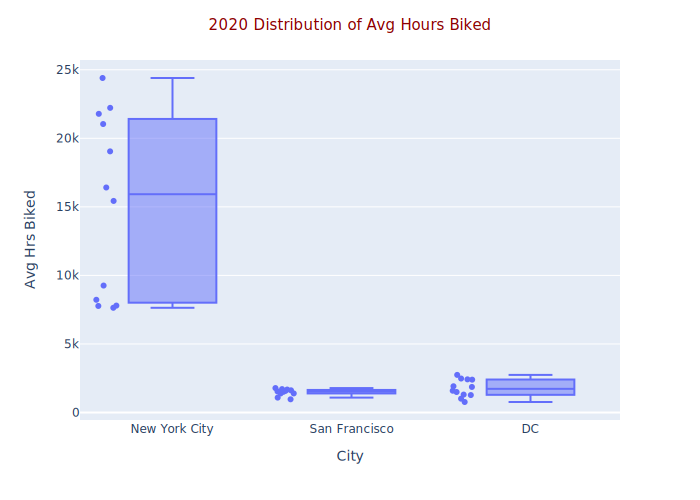

In [35]:
# 2020 Box Plot of Avg Hours Biked
import plotly.express as px

 
fig = px.box(Combined2020, x = "City", y="Avg_Hrs", points="all")

fig.update_layout(
                   title_text = '2020 Distribution of Avg Hours Biked',
                   title_font = dict(size=15,family='Verdana', 
                                     color='darkred'),
                   title_x=0.5,
                    yaxis_title='Avg Hrs Biked')

fig.show('svg')

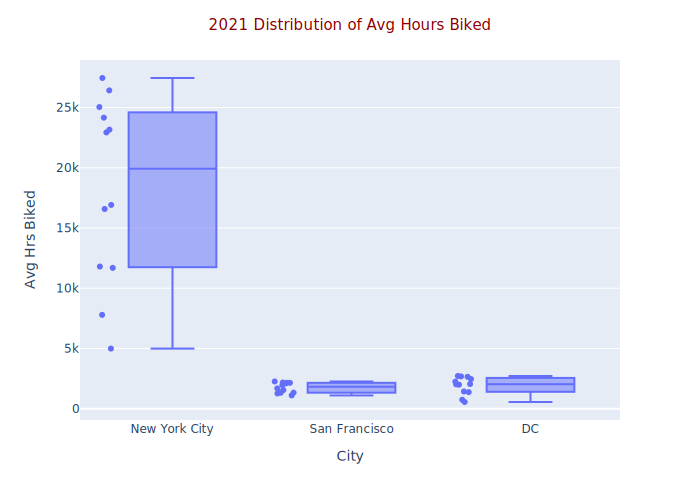

In [25]:
# 2021 Box Plot of Avg Hours Biked
import plotly.express as px

 
fig = px.box(Combined2021, x = "City", y="Avg_Hrs", points="all")

fig.update_layout(
                   title_text = '2021 Distribution of Avg Hours Biked',
                   title_font = dict(size=15,family='Verdana', 
                                     color='darkred'),
                   title_x=0.5,
                  yaxis_title='Avg Hrs Biked')

fig.show('svg')

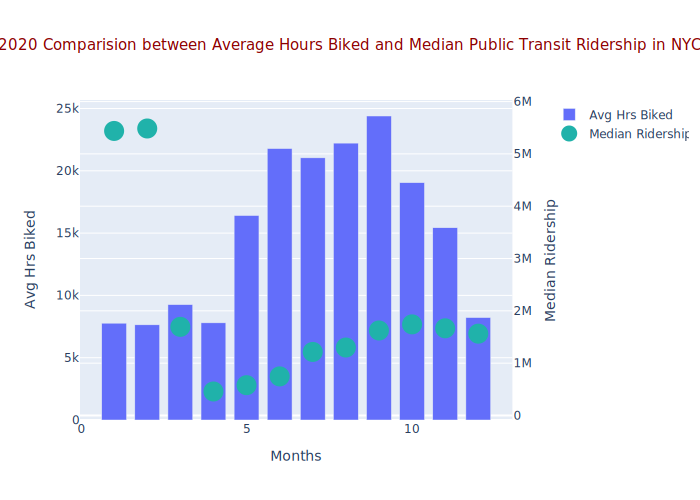


 Looking at the chart above it can be shown in NYC in colder months (January and February) average hours biked
 are down, and median ridership for public transit is high.


In [44]:
# 2020 Comparision between Average Hours Biked and Median Public Transit Ridership in NYC 

import plotly.graph_objects as go
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots

NY2020 = Combined2020[(Combined2020.City == 'New York City')] 

fig = make_subplots(specs=[[{'secondary_y': True}]])

width = 0.75


fig.add_trace(go.Bar(x=NY2020['Month'], y= NY2020['Avg_Hrs'],  name='Avg Hrs Biked', width = width), secondary_y=False)  

fig.add_trace(go.Scatter(x=NY2020['Month'], y= NY2020['Median_Ridership'],  name='Median Ridership', mode="markers",
                marker=dict(size=20, color="LightSeaGreen")), secondary_y=True)  

fig.update_layout(
                   title_text = '2020 Comparision between Average Hours Biked and Median Public Transit Ridership in NYC',
                   title_font = dict(size=15,family='Verdana', 
                                     color='darkred'),
                   title_x=0.5,
                yaxis_title='Avg Hrs Biked',
                xaxis_title = 'Months'
                 )

fig.update_yaxes(title_text="Median Ridership", secondary_y=True)

fig.show('svg')

print('\n','Looking at the chart above it can be shown in NYC in colder months (January and February) average hours biked' 
'\n','are down, and median ridership for public transit is high.')

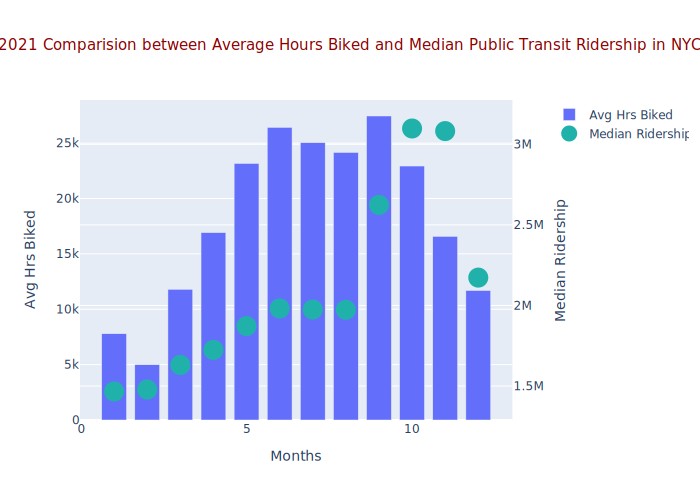


 Looking at the chart above it can be shown in NYC in colder months (January and February) average hours biked
 are down, and median ridership for public transit is down compared to the other months.


In [45]:
# 2021 Comparision between Average Hours Biked and Median Public Transit Ridership in NYC 

import plotly.graph_objects as go
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots

NY2021 = Combined2021[(Combined2021.City == 'New York City')] 

fig = make_subplots(specs=[[{'secondary_y': True}]])

width = 0.75


fig.add_trace(go.Bar(x=NY2021['Month'], y= NY2021['Avg_Hrs'],  name='Avg Hrs Biked', width = width), secondary_y=False)  

fig.add_trace(go.Scatter(x=NY2021['Month'], y= NY2021['Median_Ridership'],  name='Median Ridership', mode="markers",
                marker=dict(size=20, color="LightSeaGreen")), secondary_y=True)  

fig.update_layout(
                   title_text = '2021 Comparision between Average Hours Biked and Median Public Transit Ridership in NYC',
                   title_font = dict(size=15,family='Verdana', 
                                     color='darkred'),
                   title_x=0.5,
                yaxis_title='Avg Hrs Biked',
                xaxis_title = 'Months'
                 )

fig.update_yaxes(title_text="Median Ridership", secondary_y=True)

fig.show('svg')

print('\n','Looking at the chart above it can be shown in NYC in colder months (January and February) average hours biked' 
'\n','are down, and median ridership for public transit is down compared to the other months.')